In [1]:
from forse.networks.dcgan import *
import matplotlib.pyplot as plt
from forse.tools.nn_tools import *
from forse.tools.img_tools import *
from forse.tools.mix_tools import *

Using TensorFlow backend.


In [2]:
def estimate_marchingsquare(data , threshold ):
    width = data.shape[0]
    height= data.shape[1]
    f,u,chi=0 ,0,0
    for i in range(width-1 ):
        for j in range(height-1):
            pattern=0
            if (data[i,j]     > threshold) : pattern += 1;
            if (data[i+1,j]   > threshold) : pattern += 2;
            if (data[i+1,j+1] > threshold) : pattern += 4;
            if (data[i,j+1 ]  > threshold) : pattern += 8;

            if pattern ==0 :
                break

            elif pattern==1:
                a1 = (data[i,j] - threshold) / (data[i,j] - data[i+1,j])
                a4 = (data[i,j] - threshold) / (data[i,j] - data[i,(j+1)]);
                f = f + 0.5 * a1 * a4;
                u = u + np.sqrt(a1 * a1 + a4 * a4);
                chi = chi + 0.25;
                break;
            elif pattern==2:
                a1 = (data[i,j] - threshold) / (data[i,j] - data[i+1,j]);
                a2 = (data[i+1,j] - threshold) / (data[i+1,j] - data[i+1, (j+1)]);
                f = f + 0.5 * (1 - a1) * (a2);
                u = u + np.sqrt((1 - a1) * (1 - a1) + a2 * a2);
                chi = chi + 0.25;
                break;
            elif pattern==3:
                a2 = (data[i+1,j] - threshold) / (data[i+1,j] - data[i+1,(j+1)]);
                a4 = (data[i,j] - threshold) / (data[i,j] - data[i,(j+1)]);
                f = f + a2 + 0.5 * (a4 - a2);
                u = u + np.sqrt(1 + (a4 - a2) * (a4 - a2));
                break;
            elif pattern==4:
                a2 = (data[ i+1,j] - threshold) / (data[i+1,j ] - data[ i+1,j+1]);
                a3 = (data[ i,j+1 ] -  threshold) / (data[i,j+1] - data[ i+1,j+1]);
                f = f + 0.5 * (1 - a2) * (1 - a3);
                u = u + np.sqrt((1 - a2) * (1 - a2) + (1 - a3) * (1 - a3));
                chi = chi + 0.25;
                break;
            elif pattern==5:
                a1 = (data[i,j] - threshold) / (data[i,j] - data[i+1,j]);
                a2 = (data[i+1,j] - threshold) / (data[i+1,j] - data[i+1,j+1]);
                a3 = (data[i,j+1] - threshold) / (data[i,j+1] - data[i+1,j+1]);
                a4 = (data[i,j] - threshold) / (data[i,j] - data[i,j+1]);
                f = f + 1 - 0.5 * (1 - a1) * a2 - 0.5 * a3 * (1 - a4);
                u = u + np.sqrt((1 - a1) * (1 - a1) + a2 * a2) + np.sqrt(a3 * a3 + (1 - a4) * (1 - a4));
                chi = chi + 0.5;
                break;
            elif pattern==6:
                a1 = (data[i,j] - threshold) / (data[i,j] - data[i+1,j]);
                a3 = (data[i,j+1] - threshold) / (data[i,j+1] - data[i+1,j+1]);
                f = f + (1 - a3) + 0.5 * (a3 - a1);
                u = u + np.sqrt(1 + (a3 - a1) * (a3 - a1));
                break;
            elif pattern==7:
                a3 = (data[i,j+1] - threshold) / (data[i,j+1] - data[i+1,j+1]);
                a4 = (data[i,j] - threshold) / (data[i,j] - data[i,j+1]);
                f = f + 1 - 0.5 * a3 * (1 - a4);
                u = u + np.sqrt(a3 * a3 + (1 - a4) * (1 - a4));
                chi = chi - 0.25;
                break;

            elif pattern==8:
                a3 = (data[i,j+1] - threshold) / (data[i,j+1] - data[i+1,j+1]);
                a4 = (data[i,j] - threshold) / (data[i,j] - data[i,j+1]);
                f = f + 0.5 * a3 * (1 - a4);
                u = u + np.sqrt(a3 * a3 + (1 - a4) * (1 - a4));
                chi = chi + 0.25;
                break;

            elif pattern==9:
                a1 = (data[i,j] - threshold) / (data[i,j] - data[i+1,j]);
                a3 = (data[i,j+1] - threshold) / (data[i,j+1] - data[i+1,j+1]);
                f = f + a1 + 0.5 * (a3 - a1);
                u = u + np.sqrt(1 + (a3 - a1) * (a3 - a1));
                break;

            elif pattern==10:
                a1 = (data[i,j] - threshold) / (data[i,j] - data[i+1,j]);
                a2 = (data[i+1,j] - threshold) / (data[i+1,j] - data[i+1,j+1]);
                a3 = (data[i,j+1] - threshold) / (data[i,j+1] - data[i+1,j+1]);
                a4 = (data[i,j] - threshold) / (data[i,j] - data[i,j+1]);
                f = f + 1 - 0.5 * a1 * a4 + 0.5 * (1 - a2) * (1 - a3);
                u = u + np.sqrt(a1 * a1 + a4 * a4) + np.sqrt((1 - a2) * (1 - a2) + (1 - a3) * (1 - a3));
                chi = chi + 0.5;
                break;

            elif pattern==11:
                a2 = (data[i+1,j] - threshold) / (data[i+1,j] - data[i+1,j+1]);
                a3 = (data[i,j+1] - threshold) / (data[i,j+1] - data[i+1,j+1]);
                f = f + 1 - 0.5 * (1 - a2) * (1 - a3);
                u = u + np.sqrt((1 - a2) * (1 - a2) + (1 - a3) * (1 - a3));
                chi = chi - 0.25;
                break;

            elif pattern==12:
                a2 = (data[i+1,j] - threshold) / (data[i+1,j] - data[i+1,j+1]);
                a4 = (data[i,j] - threshold) / (data[i,j] - data[i,j+1]);
                f = f + (1 - a2) + 0.5 * (a2 - a4);
                u = u + np.sqrt(1 + (a2 - a4) * (a2 - a4));
                break;

            elif pattern==13:
                a1 = (data[i,j] - threshold) / (data[i,j] - data[i+1,j]);
                a2 = (data[i+1,j] - threshold) / (data[i+1,j] - data[i+1,j+1]);
                f = f + 1 - .5 * (1 - a1) * a2;
                u = u + np.sqrt((1 - a1) * (1 - a1) + a2 * a2);
                chi = chi - 0.25;
                break;

            elif pattern==14:
                a1 = (data[i,j] - threshold) / (data[i,j] - data[i+1,j]);
                a4 = (data[i,j] - threshold) / (data[i,j] - data[i,j+1]);
                f = f + 1 - 0.5 * a1 * a4;
                u = u + np.sqrt(a1 * a1 + a4 * a4);
                chi = chi - 0.25;
                break;

            elif pattern == 15:
                f +=1 ;
                break;


    return f,u, chi

def get_functionals(im , nevals= 32):
    vmin =im.min() ; vmax=im.max()

    rhos =  np.linspace( vmin,vmax, nevals)
    f= np.zeros_like(rhos)
    u= np.zeros_like(rhos)
    chi= np.zeros_like(rhos)

    for k, rho in np.ndenumerate( rhos) :
        f[k], u[k],chi[k]=  estimate_marchingsquare(im, rho )

    return rhos, f,u,chi


def return_intersection(hist_1, hist_2):
    minima = np.minimum(hist_1, hist_2)
    intersection = np.true_divide(np.sum(minima), np.sum(hist_2))
    return intersection

In [3]:
def smooth_accuracy(y_true, y_pred):
        return K.mean(K.equal(K.round(y_true), K.round(y_pred)))

In [4]:
dcgan = DCGAN(output_directory='/global/homes/k/krach/scratch/NNforFG/DCGAN/tests/ratio/', img_size=(64, 64))
dir_models = '/global/homes/k/krach/scratch/NNforFG/DCGAN/tests/ratio/models/pswap_10/'
dcgan.discriminator = load_model(dir_models+'discrim_99999.h5')
dcgan.generator = load_model(dir_models+'generat_99999.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


/usr/common/software/tensorflow/gpu-tensorflow/1.13.1-py36/lib/python3.6/site-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [84]:
dcgan = DCGAN(output_directory='/global/homes/k/krach/scratch/NNforFG/DCGAN/tests/ratio/', img_size=(64, 64))
dir_models = '/global/homes/k/krach/scratch/NNforFG/DCGAN/tests/ratio/models/pswap_10/'
dir_models = '/global/homes/k/krach/scratch/NNforFG/DCGAN/opt/lat20/models/'
#dcgan.discriminator = load_model(dir_models+'discrim_15000.h5')
#dcgan.generator = load_model(dir_models+'generat_15000.h5')
#dcgan.discriminator = load_model(dir_models+'discrim_10000.h5', custom_objects={'smooth_accuracy': smooth_accuracy})
dcgan.generator = load_model(dir_models+'generat_95000.h5', custom_objects={'smooth_accuracy': smooth_accuracy})

In [85]:
training_path = '/global/homes/k/krach/scratch/NNforFG/training_set/'
training_file = 'training_set_1000patches_20x20deg_T_HR1deg_LR5deg_Npix64_lat20.npy'
X_train, X_test, Y_train, Y_test = load_training_set(training_path+training_file)
gen_imgs_test = dcgan.generator.predict(X_test)
#gen_imgs_train = dcgan.generator.predict(X_train)

Text(0.5, 1.0, 'HFI 5°')

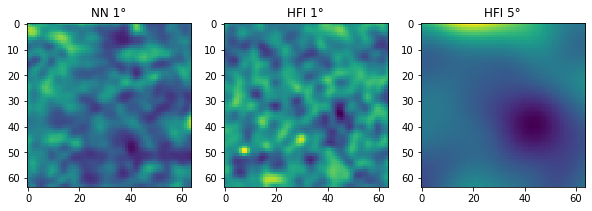

In [88]:
N = 62
vminm = np.min(X_test[N, :, :, 0])
vmaxm = np.max(X_test[N, :, :, 0])
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(gen_imgs_test[N, :, :, 0], vmin=vminm, vmax=vmaxm)
plt.title('NN 1°')
plt.subplot(132)
plt.imshow(Y_test[N, :, :, 0], vmin=vminm, vmax=vmaxm)
plt.title('HFI 1°')
plt.subplot(133)
plt.imshow(X_test[N, :, :, 0], vmin=vminm, vmax=vmaxm)
plt.title('HFI 5°')

In [89]:
rhos_X, f_X, u_X, chi_X = get_functionals(X_test[N, :, :, 0])
rhos_Y, f_Y, u_Y, chi_Y = get_functionals(Y_test[N, :, :, 0])
rhos_NN, f_NN, u_NN, chi_NN = get_functionals(gen_imgs_test[N, :, :, 0])

In [90]:
rhos_hfi, f_hfi, u_hfi, chi_hfi = [], [], [], []    
rhos_nn, f_nn, u_nn, chi_nn = [], [], [], []  
for i in range(200):
    rhos_Y, f_Y, u_Y, chi_Y = get_functionals(Y_test[i, :, :, 0])
    rhos_NN, f_NN, u_NN, chi_NN= get_functionals(gen_imgs_test[i, :, :, 0])
    f_hfi.append(f_Y)
    f_nn.append(f_NN)
    u_hfi.append(u_Y)
    u_nn.append(u_NN)
    chi_hfi.append(chi_Y)
    chi_nn.append(chi_NN)

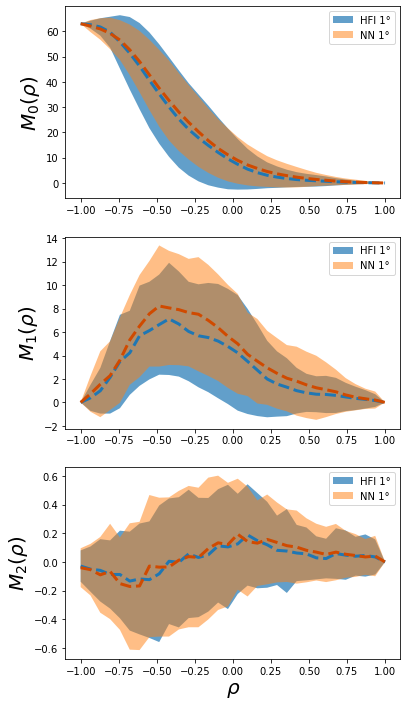

In [91]:
f_hfi = np.array(f_hfi)
f_nn = np.array(f_nn)
u_hfi = np.array(u_hfi)
u_nn = np.array(u_nn)
chi_hfi = np.array(chi_hfi)
chi_nn = np.array(chi_nn)
plt.figure(figsize=(6, 12))
plt.subplot(311)
plt.ylabel(r'$M_0(\rho$)', fontsize=20)


plt.fill_between(rhos_Y, 
                     np.mean(f_hfi, axis=0)-np.std(f_hfi, axis=0), 
                     np.mean(f_hfi, axis=0)+np.std(f_hfi, axis=0), 
                     lw=1, label='HFI 1°', alpha=0.7)
plt.plot(rhos_Y, np.mean(f_hfi, axis=0), lw=3, ls='--')
plt.fill_between(rhos_Y, 
                     np.mean(f_nn, axis=0)-np.std(f_nn, axis=0), 
                     np.mean(f_nn, axis=0)+np.std(f_nn, axis=0), 
                     lw=1, label='NN 1°', alpha=0.5)
plt.plot(rhos_Y, np.mean(f_nn, axis=0), lw=3, ls='--', color='#D04A00')
plt.legend()
plt.subplot(312)
plt.ylabel(r'$M_1(\rho$)', fontsize=20)


plt.fill_between(rhos_Y, 
                     np.mean(u_hfi, axis=0)-np.std(u_hfi, axis=0), 
                     np.mean(u_hfi, axis=0)+np.std(u_hfi, axis=0), 
                     lw=1, label='HFI 1°', alpha=0.7)
plt.plot(rhos_Y, np.mean(u_hfi, axis=0), lw=3, ls='--')
plt.fill_between(rhos_Y, 
                     np.mean(u_nn, axis=0)-np.std(u_nn, axis=0), 
                     np.mean(u_nn, axis=0)+np.std(u_nn, axis=0), 
                     lw=1, label='NN 1°', alpha=0.5)
plt.plot(rhos_Y, np.mean(u_nn, axis=0), lw=3, ls='--', color='#D04A00')



plt.legend()
plt.subplot(313)
plt.fill_between(rhos_Y, 
                     np.mean(chi_hfi, axis=0)-np.std(chi_hfi, axis=0), 
                     np.mean(chi_hfi, axis=0)+np.std(chi_hfi, axis=0), 
                     lw=1, label='HFI 1°', alpha=0.7)
plt.plot(rhos_Y, np.mean(chi_hfi, axis=0), lw=3, ls='--')
plt.ylabel(r'$M_1(\rho$)', fontsize=20)



plt.fill_between(rhos_Y, 
                     np.mean(chi_nn, axis=0)-np.std(chi_nn, axis=0), 
                     np.mean(chi_nn, axis=0)+np.std(chi_nn, axis=0), 
                     lw=1, label='NN 1°', alpha=0.5)
plt.plot(rhos_Y, np.mean(chi_nn, axis=0), lw=3, ls='--', color='#D04A00')
plt.xlabel(r'$\rho$', fontsize=20)
plt.ylabel(r'$M_2(\rho$)', fontsize=20)

plt.legend()

In [92]:
m1 = compute_intersection(rhos_Y, 
                     [np.mean(f_hfi, axis=0)-np.std(f_hfi, axis=0), np.mean(f_hfi, axis=0)+np.std(f_hfi, axis=0)], 
                     [np.mean(f_nn, axis=0)-np.std(f_nn, axis=0),np.mean(f_nn, axis=0)+np.std(f_nn, axis=0)], 
                     npt=10000)
m2 = compute_intersection(rhos_Y, 
                     [np.mean(u_hfi, axis=0)-np.std(u_hfi, axis=0), np.mean(u_hfi, axis=0)+np.std(u_hfi, axis=0)], 
                     [np.mean(u_nn, axis=0)-np.std(u_nn, axis=0),np.mean(u_nn, axis=0)+np.std(u_nn, axis=0)], 
                     npt=10000)
m3 = compute_intersection(rhos_Y, 
                     [np.mean(chi_hfi, axis=0)-np.std(chi_hfi, axis=0), np.mean(chi_hfi, axis=0)+np.std(chi_hfi, axis=0)], 
                     [np.mean(chi_nn, axis=0)-np.std(chi_nn, axis=0),np.mean(chi_nn, axis=0)+np.std(chi_nn, axis=0)], 
                     npt=10000)

In [93]:
print(m1, m2, m3)

0.8243948742287612 0.9063618837785734 0.9756258234519104


In [94]:
patch_path = '/global/homes/k/krach/scratch/NNforFG/training_set/'
Ys, Xs = np.load(patch_path+'training_set_PySM_1000patches_20x20deg_T_HR1deg_LR5deg_Npix64_set2.npy')
Yl, Xl = np.load(patch_path+'training_set_PySM_1000patches_20x20deg_T_HR1deg_LR5deg_Npix320_set2.npy')
Yl_zoom = np.zeros((1000, 64, 64))
X_edges = []
for i in range(40):
    j = i
    Yl_zoom[i*25:(i+1)*25] = divide_image(Yl[j], 64, 64)[0]
X = Yl_zoom
for i in range(X.shape[0]):
    X[i], Xmin, Xmax = rescale_min_max(X[i], return_min_max=True)
    X_edges.append([Xmin, Xmax])
x_test, x_test2 = split_training_set(X)
X_edges = np.array(X_edges)    

In [95]:
gen_imgs_test = dcgan.generator.predict(x_test)

In [96]:
pysm_ss, pysm_1d = np.load(patch_path+'training_set_PySM_1000patches_20x20deg_T_HR12amin_LR1deg_Npix320_set2.npy')

In [97]:
pysm_ss_zoom = np.zeros((1000, 64, 64))
pysm_1d_zoom = np.zeros((1000, 64, 64))
pysm_ss_edges = []
for i in range(40):
    j = i
    pysm_ss_zoom[i*25:(i+1)*25] = divide_image(pysm_ss[j], 64, 64)[0]
    pysm_1d_zoom[i*25:(i+1)*25] = divide_image(pysm_1d[j], 64, 64)[0]
for i in range(1000):
    ratio = pysm_ss_zoom/pysm_1d_zoom
    pysm_ss_edges.append([ratio[i].min(), ratio[i].max()])
pysm_ss_edges = np.array(pysm_ss_edges)

In [98]:
NN_norm_back = rescale_min_max_back(gen_imgs_test[N, :, :, 0], pysm_ss_edges[N])

In [99]:
bnormed_gen = np.copy(gen_imgs_test)
for i in range(800):
    bnormed_gen[i] = (rescale_min_max_back(gen_imgs_test[i], [np.mean(pysm_ss_edges[:,0]), np.mean(pysm_ss_edges[:,1])]))

In [100]:
steps = np.arange(0, 800, 25)
print(len(steps))

32


In [101]:
steps = np.arange(0, 800, 25)
large_scale_tot = []
small_scale_tot = []
NN_small_scale_tot = []
rhos_nn_ss, f_nn_ss, u_nn_ss, chi_nn_ss = [], [], [], [] 
rhos_pysm_ss, f_pysm_ss, u_pysm_ss, chi_pysm_ss = [], [], [], [] 
for s in steps:
    large_scale = pysm_1d[int(s/25)]
    small_scale = pysm_ss[int(s/25)]
    images_oversamp = divide_image(large_scale, 32, 64)
    images_oversamp_ss = divide_image(small_scale, 32, 64)
    Xos = np.array(images_oversamp[0])
    indx = images_oversamp[2]
    weights = images_oversamp[1]
    for i in range(Xos.shape[0]):
        ratio_oversamp_ss = np.array(images_oversamp[0][i])/np.array(images_oversamp_ss[0][i])
        ratio_oversamp_ss = rescale_min_max(ratio_oversamp_ss)
        rhos_pysm_ss, f_PYSM, u_PYSM, chi_PYSM= get_functionals(ratio_oversamp_ss)
        f_pysm_ss.append(f_PYSM)
        u_pysm_ss.append(u_PYSM)
        chi_pysm_ss.append(chi_PYSM)
        Xos[i] = rescale_min_max(Xos[i])
    Xos = Xos.reshape(Xos.shape[0], 64, 64, 1)
    gen_imgs_os = dcgan.generator.predict(Xos)
    nn_images_oversamp = np.copy(images_oversamp)
    nn_images_oversamp[0] = gen_imgs_os[:, :, :, 0]
    for i in range(len(nn_images_oversamp[0])):
        nn_images_oversamp_scal = rescale_min_max(nn_images_oversamp[0][i])
        rhos_nn_ss, f_NN, u_NN, chi_NN= get_functionals(nn_images_oversamp_scal)
        f_nn_ss.append(f_NN)
        u_nn_ss.append(u_NN)
        chi_nn_ss.append(chi_NN)
        nn_images_oversamp[0][i] = (rescale_min_max_back(nn_images_oversamp[0][i], [np.mean(pysm_ss_edges[:,0]), np.mean(pysm_ss_edges[:,1])]))
    NN_small_scale_apo = apodize_and_unify_images(nn_images_oversamp)
    large_scale_tot.append(large_scale)
    small_scale_tot.append(small_scale/large_scale)
    NN_small_scale_tot.append(NN_small_scale_apo)

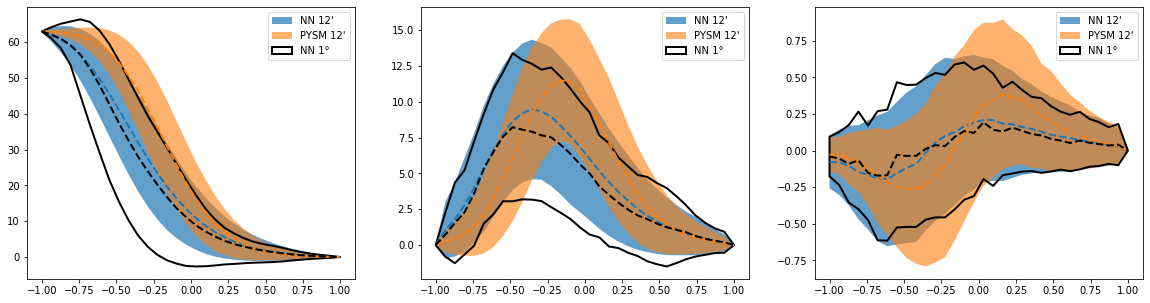

In [102]:
f_nn_ss = np.array(f_nn_ss)
u_nn_ss = np.array(u_nn_ss)
chi_nn_ss = np.array(chi_nn_ss)
f_pysm_ss = np.array(f_pysm_ss)
u_pysm_ss = np.array(u_pysm_ss)
chi_pysm_ss = np.array(chi_pysm_ss)
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.fill_between(rhos_nn_ss, 
                     np.mean(f_nn_ss, axis=0)-np.std(f_nn_ss, axis=0), 
                     np.mean(f_nn_ss, axis=0)+np.std(f_nn_ss, axis=0), 
                     lw=1, label="NN 12'", alpha=0.7)
plt.plot(rhos_nn_ss, np.mean(f_nn_ss, axis=0), lw=2, ls='--')


plt.fill_between(rhos_pysm_ss, 
                     np.mean(f_pysm_ss, axis=0)-np.std(f_pysm_ss, axis=0), 
                     np.mean(f_pysm_ss, axis=0)+np.std(f_pysm_ss, axis=0), 
                     label="PYSM 12'", alpha=0.6)
plt.plot(rhos_pysm_ss, np.mean(f_pysm_ss, axis=0), lw=2, ls='--')


plt.fill_between(rhos_Y, 
                     np.mean(f_hfi, axis=0)-np.std(f_hfi, axis=0), 
                     np.mean(f_hfi, axis=0)+np.std(f_hfi, axis=0), 
                     lw=2, ls='-', label='NN 1°', edgecolor='black', facecolor='')
plt.plot(rhos_Y, np.mean(f_nn, axis=0), color='black', lw=2, ls='--')


plt.legend()
plt.subplot(132)
plt.fill_between(rhos_nn_ss, 
                     np.mean(u_nn_ss, axis=0)-np.std(u_nn_ss, axis=0), 
                     np.mean(u_nn_ss, axis=0)+np.std(u_nn_ss, axis=0), 
                     lw=1, label="NN 12'", alpha=0.7)
plt.plot(rhos_nn_ss, np.mean(u_nn_ss, axis=0), lw=2, ls='--')
plt.fill_between(rhos_pysm_ss, 
                     np.mean(u_pysm_ss, axis=0)-np.std(u_pysm_ss, axis=0), 
                     np.mean(u_pysm_ss, axis=0)+np.std(u_pysm_ss, axis=0), 
                     label="PYSM 12'", alpha=0.6)
plt.plot(rhos_pysm_ss, np.mean(u_pysm_ss, axis=0), lw=2, ls='--')


plt.fill_between(rhos_Y, 
                     np.mean(u_nn, axis=0)-np.std(u_nn, axis=0), 
                     np.mean(u_nn, axis=0)+np.std(u_nn, axis=0), 
                     lw=2, ls='-', label='NN 1°', edgecolor='black', facecolor='')
plt.plot(rhos_Y, np.mean(u_nn, axis=0), color='black', lw=2, ls='--')


plt.legend()
plt.subplot(133)
plt.fill_between(rhos_nn_ss, 
                     np.mean(chi_nn_ss, axis=0)-np.std(chi_nn_ss, axis=0), 
                     np.mean(chi_nn_ss, axis=0)+np.std(chi_nn_ss, axis=0), 
                     lw=1, label="NN 12'", alpha=0.7)
plt.plot(rhos_nn_ss, np.mean(chi_nn_ss, axis=0), lw=2, ls='--')
plt.fill_between(rhos_pysm_ss, 
                     np.mean(chi_pysm_ss, axis=0)-np.std(chi_pysm_ss, axis=0), 
                     np.mean(chi_pysm_ss, axis=0)+np.std(chi_pysm_ss, axis=0), 
                     label="PYSM 12'", alpha=0.6)
plt.plot(rhos_pysm_ss, np.mean(chi_pysm_ss, axis=0), lw=2, ls='--')
plt.fill_between(rhos_Y, 
                     np.mean(chi_nn, axis=0)-np.std(chi_nn, axis=0), 
                     np.mean(chi_nn, axis=0)+np.std(chi_nn, axis=0), 
                     lw=2, ls='-', label='NN 1°', edgecolor='black', facecolor='')
plt.plot(rhos_Y, np.mean(chi_nn, axis=0), color='black', lw=2, ls='--')
plt.legend()


In [103]:
def compute_intersection(x, cont1, cont2, npt=10000):
    ymin1 = cont1[0]
    ymax1 = cont1[1]
    ymin2 = cont2[0]
    ymax2 = cont2[1]
    yMAX = np.max([ymax1, ymax2])+0.1*np.max([ymax1, ymax2])
    yMIN = np.min([ymin1, ymin2])-0.1*np.min([ymin1, ymin2])
    area1 = 0
    area2 = 0
    areaint = 0
    ind_xi = np.random.randint(0, len(x), npt)
    yi = np.random.uniform(yMIN, yMAX, npt)
    for i in range(npt):
        if ymin1[ind_xi[i]]<=yi[i]<=ymax1[ind_xi[i]]:
            area1 += 1
            if ymin2[ind_xi[i]]<=yi[i]<=ymax2[ind_xi[i]]:
                areaint += 1
    return areaint/area1

In [104]:
compute_intersection(rhos_nn_ss, 
                     [np.mean(f_hfi, axis=0)-np.std(f_hfi, axis=0), np.mean(f_hfi, axis=0)+np.std(f_hfi, axis=0)], 
                     [np.mean(f_nn_ss, axis=0)-np.std(f_nn_ss, axis=0), np.mean(f_nn_ss, axis=0)+np.std(f_nn_ss, axis=0)], 
                     npt=10000)

0.7141477547078706